## Radiative Cooling
Typically, materials that sit in the sun get hot (duh!).  However, there are some very special cases in which a material can actually get cooler while sitting in the sun.  All that is required is that the material radiates more energy **into** the universe than it absorbs **from** the universe; simple!  We can define a flow of *cooling* radiative power from a material as follows:
\begin{equation}
P_{cool}(T) = P_{rad}(T) - P_{atm}(T_{amb}) - P_{sun},
\end{equation}
where $P_{rad}(T)$ quantifies the flow of radiative power from the material into the universe,
$P_{atm}(T_{amb})$ quantifies the flow of radiative power from the earth's atmosphere to the material, and $P_{sun}$ quantifies the flow of radiative power from the sun to the material.
If $P_{cool}(T)$ is positive, net radiative cooling occurs, and if $P_{cool}(T)$ is positive, net radiative heating occurs.

Each of these terms can be defined in terms of the *emissivity* of the material, which is equivalent to its *absorptivity* (in fact, for the $P_{sun}$ term, absorptivity is probably the more intuitive concept):
\begin{equation}
P_{rad}(T) = A \: 2\pi \int_0^{\pi/2} d\theta \: {\rm sin}(\theta) \int_{\lambda_{min}}^{\lambda_{max}} d\lambda \left(\epsilon_p(\lambda, \theta) + \epsilon_s(\lambda, \theta)  \right) \rho(\lambda, T_{mat}) ,
\end{equation}

\begin{equation}
P_{atm}(T_{amb}) = A 2\pi \int_0^{\pi/2} d\theta \: {\rm sin}(\theta) {\rm cos}(\theta)\int_{\lambda_{min}}^{\lambda_{max}} 
d\lambda \left(\epsilon_p(\lambda, \theta) + \epsilon_s(\lambda, \theta)  \right) \rho(\lambda, T_{amb}) 
\epsilon_{atm}(\lambda, \theta),
\end{equation}

and

\begin{equation}
P_{sun} = A \int_{\lambda_{min}}^{\lambda_{max}} d\lambda \: \frac{1}{2} \left( \epsilon_p(\lambda, \theta_{sun}) + \epsilon_s(\lambda, \theta_{sun})\right) AM(\lambda).
\end{equation}
In the above equation, the $\epsilon_p(\lambda, \theta)$/$\epsilon_s(\lambda, \theta)$ define the emissivity/absorptivity of the material as a function of wavelength, angle, and polarization of light, $\rho(\lambda, T)$ is Planck's blackbody radiation law, $AM(\lambda)$
is the solar spectrum, $T_{mat}$ denotes the temperature of the material, and $T_{amb}$ denotes the ambient temperature.  Note that the absorptivity/emissivity of an opaque material is complementary to its reflectance: $\epsilon(\lambda) = 1 - R(\lambda)$.

In the above, $T_{amb}$ and $T_{mat}$ will both be around 300 K.  

### Question 1:  In what spectral region does Planck's Blackbody Law peak at 300 K?  How does this compare to the peak of the solar spectrum?

### Question 2:  What properties do you think an ideal cooling material should have in terms of its emissivity/absorptivity in the spectral region that overlaps with the solar spectrum?

### Question 3: What properties do you think an ideal cooling material should have in terms of its emissivity/absorptivity in the spectral region that overlaps with the Blackbody spectrum at 300K?

### Question 4: How can you explain the origin of the radiation flowing from the earth's atmosphere to the structure?  Why does the sky itself radiate?

This notebook will build the multi-layer structure described in Raman $et$ $al.$, Nature 515, 540-546 (2014), compute plot its emissivity in the solar region and in the atmospheric transmissivity region of the spectrum (~300-2500 nm for the former, 2500-20000 nm for the latter), and compute the cooling power for several different differences between the temperature of the structure and the ambient temperature.  


 Temperature not specified!
 Proceeding with default T = 300 K


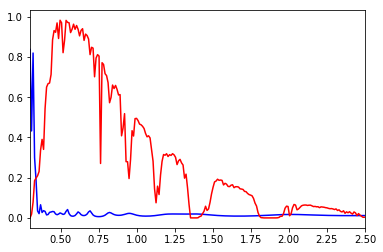

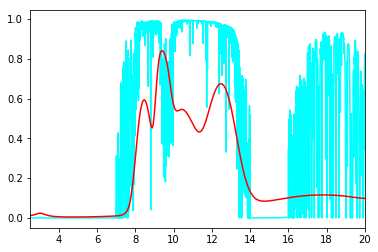

In [2]:
### Import WPTHERML class!
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib

### Define structure!

structure = {

        'Material_List': ['Air', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'Ag', 'Air'],
        'Thickness_List': [0, 230e-9, 485e-9, 688e-9, 13e-9, 73e-9, 34e-9, 54e-9, 200e-9, 0],
        'Lambda_List': [300e-9, 20000e-9, 2000],
        'EXPLICIT_ANGLE': 1,
        'COOLING': 1
     
        }

### create instance of multilayer class - results will be computed automatically
w_slab = multilayer(structure)
AM = datalib.AM(w_slab.lambda_array)
T_atm = datalib.ATData(w_slab.lambda_array)
BB = datalib.BB(w_slab.lambda_array, w_slab.T_ml)

### plot results!
plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'blue')
plt.plot(w_slab.lambda_array*1e6, AM/(1.4*1e9), 'red')
plt.xlim(0.3,2.5)
plt.show()


plt.plot(w_slab.lambda_array*1e6, T_atm, 'cyan')
plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'red')
#plt.plot(w_slab.lambda_array*1e6, BB, 'black')
plt.xlim(2.5,20)
plt.show()


In [3]:
#w_slab.cooling_power()

print("Radiative Power (cooling) is ",w_slab.radiative_power_val, "W/m^2")
print("Absorbed Solar Power (warming) is ",w_slab.solar_power_val, "W/m^2")
print("Absorbed Atmospheric Radiation (warming) is ",w_slab.atmospheric_power_val, "W/m^2")
print("Net Power flux out of the structure is ",w_slab.cooling_power_val, "W/m^2")

Radiative Power (cooling) is  112.07959879454339 W/m^2
Absorbed Solar Power (warming) is  18.602633707368913 W/m^2
Absorbed Atmospheric Radiation (warming) is  29.679241649356346 W/m^2
Net Power flux out of the structure is  63.797723437818135 W/m^2


### Experiment: Try various materials in place of the complicated multi-layer structure from Fan's paper and compare the emissivity, radiative power, solar power, atmospheric power, and cooling power to the multilayer in each case.  See if you can do better than it!  One example of a 900 nm TiO2 slab follows:

 Temperature not specified!
 Proceeding with default T = 300 K


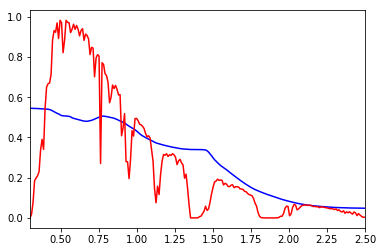

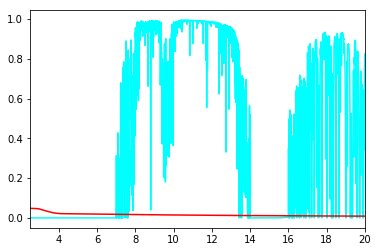

Radiative Power (cooling) is  6.032830628235416 W/m^2
Absorbed Solar Power (warming) is  397.1505693400512 W/m^2
Absorbed Atmospheric Radiation (warming) is  3.1689326701800185 W/m^2
Net Power flux out of the structure is  -394.2866713819958 W/m^2


In [4]:
structure = {

        'Material_List': ['Air', 'TiO2', 'Air'],
        'Thickness_List': [0, 200e-9, 0],
        'Lambda_List': [300e-9, 20000e-9, 2000],
        'EXPLICIT_ANGLE': 1,
        'COOLING': 1
     
        }

### create instance of multilayer class - results will be computed automatically
w_slab = multilayer(structure)
AM = datalib.AM(w_slab.lambda_array)
T_atm = datalib.ATData(w_slab.lambda_array)
BB = datalib.BB(w_slab.lambda_array, w_slab.T_ml)

### plot results!
plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'blue')
plt.plot(w_slab.lambda_array*1e6, AM/(1.4*1e9), 'red')
plt.xlim(0.3,2.5)
plt.show()


plt.plot(w_slab.lambda_array*1e6, T_atm, 'cyan')
plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'red')
#plt.plot(w_slab.lambda_array*1e6, BB, 'black')
plt.xlim(2.5,20)
plt.show()

print("Radiative Power (cooling) is ",w_slab.radiative_power_val, "W/m^2")
print("Absorbed Solar Power (warming) is ",w_slab.solar_power_val, "W/m^2")
print("Absorbed Atmospheric Radiation (warming) is ",w_slab.atmospheric_power_val, "W/m^2")
print("Net Power flux out of the structure is ",w_slab.cooling_power_val, "W/m^2")